<a href="https://colab.research.google.com/github/manasik29/Text-Mining/blob/main/Sentiment_Analysis_of_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Extract reviews of any product from ecommerce website like amazon**

**2) Perform emotion mining**

**Load the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk 

In [2]:
data = pd.read_csv("/content/Reviews.csv",encoding = "ISO-8859-1")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.shape

(187322, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187322 entries, 0 to 187321
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      187322 non-null  int64 
 1   ProductId               187322 non-null  object
 2   UserId                  187322 non-null  object
 3   ProfileName             187314 non-null  object
 4   HelpfulnessNumerator    187322 non-null  int64 
 5   HelpfulnessDenominator  187322 non-null  int64 
 6   Score                   187322 non-null  int64 
 7   Time                    187322 non-null  int64 
 8   Summary                 187315 non-null  object
 9   Text                    187322 non-null  object
dtypes: int64(5), object(5)
memory usage: 14.3+ MB


In [34]:
temp = data.sample(frac=1)          #shuffle all the data
frac = data.sample(frac=0.003)      #shuffle and get a small fraction to save some time in analysis

In [35]:
frac.shape

(562, 10)

In [ ]:
frac = frac.reset_index()
frac = frac.drop('index', axis=1)
frac = frac.drop('level_0', axis=1)

**EDA**

In [25]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               8
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   7
Text                      0
dtype: int64

In [24]:
data.isna().any()

Id                        False
ProductId                 False
UserId                    False
ProfileName                True
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                    True
Text                      False
dtype: bool

In [39]:
frac.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [40]:
frac.isna().any()

Id                        False
ProductId                 False
UserId                    False
ProfileName               False
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Time                      False
Summary                    True
Text                      False
dtype: bool

- There are missing values in ProfileName and Summary columns in the data. 
- But if we check in our frac, there are no missing values in ProfileName. So no need to worry!
- But there are some in Summary, but we will not be needing this column, so we will leave it as is it is.

In [11]:
#check for duplicate values
data[data.duplicated()].shape

(0, 10)

In [13]:
data[data.duplicated()]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


- No duplicated values as well.

In [15]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

- Data types of all columns are correct.

In [16]:
data.nunique()

Id                        187322
ProductId                  23861
UserId                    115965
ProfileName               102431
HelpfulnessNumerator         157
HelpfulnessDenominator       164
Score                          5
Time                        2854
Summary                   122521
Text                      154260
dtype: int64

In [41]:
frac.nunique()

Id                        562
ProductId                 499
UserId                    561
ProfileName               558
HelpfulnessNumerator       20
HelpfulnessDenominator     24
Score                       5
Time                      471
Summary                   545
Text                      561
dtype: int64

In [42]:
frac['Score'].value_counts().sort_index()

1     60
2     28
3     44
4     92
5    338
Name: Score, dtype: int64

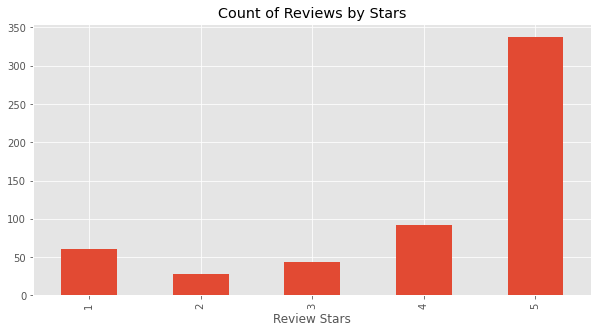

In [43]:
ax = frac['Score'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

- Majority of cx have positive sentiment according to the Reviews by stars.

**Basic NLTK**

In [45]:
example = frac['Text'][100]
print(example)

After an awful experience with those vile tasting Grove Square wannabee Keurig cups, I was very hesitant to try anything but authentic 'K-Cup (tm)' coffee portions.  I had been eyeballing these San Francisco Bay brand here on Amazon for awhile, but hadn't purchased them.  When I saw them at Costco (by the way, they sell them in a box of 80 for about $25), I decided to take the plunge.  And they're not bad.<br /><br />As mentioned by others, the 'cup' design is essentially a paper filter filled with coffee grounds and then attached to the underside of a plastic ring which fits into the Keurig brewer.  The top is sealed off with the traditional thick foil which is pierced by the top needle of the Keurig brewer.  The bottom needle which pierces the bottom of the standard K Cups does not even come into play with these as the water is forced into the grounds.  The coffee passes through from the filter and then directly out the bottom of the  k cup holder and into the coffee cup.<br /><br />

In [48]:
#Break sentence into each word
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['After',
 'an',
 'awful',
 'experience',
 'with',
 'those',
 'vile',
 'tasting',
 'Grove',
 'Square']

In [50]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [52]:
#give part of speech tagging to each word 
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('After', 'IN'),
 ('an', 'DT'),
 ('awful', 'JJ'),
 ('experience', 'NN'),
 ('with', 'IN'),
 ('those', 'DT'),
 ('vile', 'JJ'),
 ('tasting', 'VBG'),
 ('Grove', 'NNP'),
 ('Square', 'NNP')]

In [54]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [56]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [57]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  After/IN
  an/DT
  awful/JJ
  experience/NN
  with/IN
  those/DT
  vile/JJ
  tasting/VBG
  (PERSON Grove/NNP Square/NNP)
  wannabee/VBZ
  (PERSON Keurig/NNP)
  cups/NN
  ,/,
  I/PRP
  was/VBD
  very/RB
  hesitant/JJ
  to/TO
  try/VB
  anything/NN
  but/CC
  authentic/JJ
  '/''
  K-Cup/NNP
  (/(
  tm/NN
  )/)
  '/POS
  coffee/NN
  portions/NNS
  ./.
  I/PRP
  had/VBD
  been/VBN
  eyeballing/VBG
  these/DT
  San/NNP
  (PERSON Francisco/NNP Bay/NNP)
  brand/NN
  here/RB
  on/IN
  (ORGANIZATION Amazon/NNP)
  for/IN
  awhile/NN
  ,/,
  but/CC
  had/VBD
  n't/RB
  purchased/VBN
  them/PRP
  ./.
  When/WRB
  I/PRP
  saw/VBD
  them/PRP
  at/IN
  (GPE Costco/NNP)
  (/(
  by/IN
  the/DT
  way/NN
  ,/,
  they/PRP
  sell/VBP
  them/PRP
  in/IN
  a/DT
  box/NN
  of/IN
  80/CD
  for/IN
  about/RB
  $/$
  25/CD
  )/)
  ,/,
  I/PRP
  decided/VBD
  to/TO
  take/VB
  the/DT
  plunge/NN
  ./.
  And/CC
  they/PRP
  're/VBP
  not/RB
  bad./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >

VADER - 

- We remove the stopwords.
- Score each word in the setence to get a total score. 
- Sentences are given scores in neg(negative), neu(neutral), pos(positive).

In [59]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [60]:
#examples
sia.polarity_scores("I am very happy")

{'compound': 0.6115, 'neg': 0.0, 'neu': 0.334, 'pos': 0.666}

- Compound is the aggreagte of pos, neu, neg ranging b/w -1 to 1 (neg to pos).

In [61]:
sia.polarity_scores("This is disappointing")

{'compound': -0.4939, 'neg': 0.615, 'neu': 0.385, 'pos': 0.0}

In [62]:
#Let us try this on one of the comments in our data
sia.polarity_scores(example)

{'compound': 0.3069, 'neg': 0.052, 'neu': 0.891, 'pos': 0.057}

In [67]:
example1 = frac['Text'][20]
print(example1)
sia.polarity_scores(example1)

My dog suffers from an auto immune disorder which causes him to have to take a lot of meds. He also is on a novel protein diet and can't have many "normal" dog treats or food. After trying a million ways to get those pills in him I found these in the reduced allergen flavor. Yes, they stink horribly. But suddenly meal time is a treat and I couldn't be happier! Just wish more came in a bag and they were cheaper.


{'compound': 0.2211, 'neg': 0.13, 'neu': 0.729, 'pos': 0.14}

In [70]:
#Run polarity score on the entire data
res = {}
for i, row in tqdm(frac.iterrows(), total=len(frac)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/562 [00:00<?, ?it/s]

In [73]:
#combine the polarity scores and frac 
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(frac, how = 'left')

In [74]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,86829,0.000,0.838,0.162,0.8008,B0006SKCVI,A2B7DVDHUTUT5S,Abe Froman,1,1,5,1284422400,Giggity!,"In the infamous words of Sir Glenn Quagmire; ""..."
1,59278,0.067,0.613,0.319,0.8481,B0076RE7IG,A1ARCVHHCTJFBV,Melissa A. Headley,1,1,4,1329350400,Yummy,Man these things are good. I bought a pack at ...
2,117315,0.000,0.746,0.254,0.8176,B005R2GG4K,A13D7X0H3A5E6T,Kyle R. Johnson,0,0,5,1350950400,Good Coffee,The coffee was a good price and of excellent q...
3,57944,0.000,0.693,0.307,0.8555,B000AYDHTM,A2JHI62SYO24JW,"O. A. Holden Jr. ""VaGentleman""",1,1,5,1226793600,Lemon & Ginger in the same cookie!!,I love lemon cookies and I love ginger cookies...
4,126491,0.019,0.780,0.202,0.9254,B000XHTD1W,A3PMD5PUXYZXM3,"Beverly J. Cowling ""songbird_63366""",3,5,5,1249948800,best sauce ever sold!,With the exception of an old sauce made by Ada...


Text(0.5, 1.0, 'Compound versus Score on Amazon reviews')

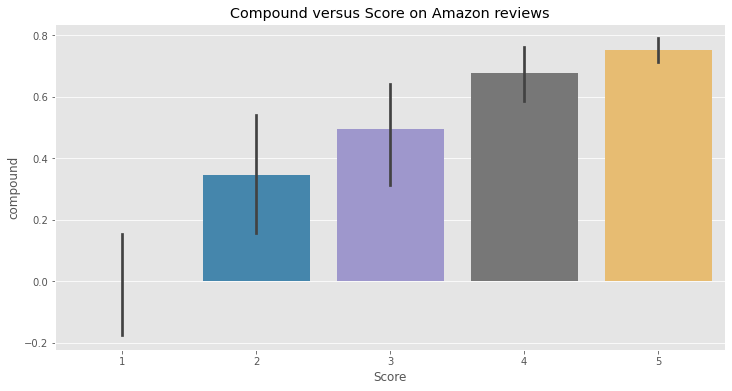

In [75]:
sns.barplot(x = 'Score', y = 'compound', data = vaders)
plt.title("Compound versus Score on Amazon reviews")

- This is exactly what we had expected. 
- Higher the star score, more positive the compound. 

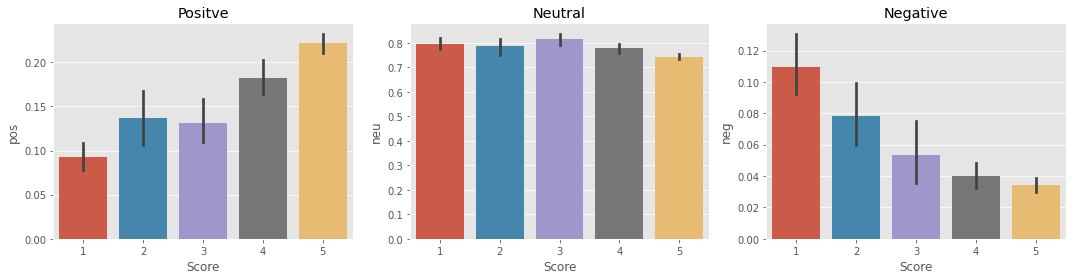

In [84]:
fig, axes= plt.subplots(1,3, figsize=(15,4))
sns.barplot(x='Score', y='pos', data=vaders, ax=axes[0])
sns.barplot(x='Score', y='neu', data=vaders, ax=axes[1])
sns.barplot(x='Score', y='neg', data=vaders, ax=axes[2])
axes[0].set_title('Positve')
axes[1].set_title('Neutral')
axes[2].set_title('Negative')
plt.tight_layout()

- This makes our point more clear. 
- Positive reviews have higher score.
- Negative reviews have lower score.